## Classification and Regression Trees

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import time

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import  LogisticRegression
from sklearn. neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestRegressor, AdaBoostClassifier, GradientBoostingRegressor, RandomForestRegressor

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, roc_auc_score
from mlxtend.plotting import plot_decision_regions

SEED = 123

We will start with building a vanilla decision tree as an example. Let us first prepare our data.

In [3]:
data = pd.read_csv("wbc.csv")

In [4]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
X = data[["radius_mean", "concave points_mean"]]

In [6]:
X.head()

,radius_mean,concave points_mean
0,17.99,0.14710
1,20.57,0.07017
2,19.69,0.12790
3,11.42,0.10520
4,20.29,0.10430


In [7]:
y = data["diagnosis"]

In [8]:
y.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [9]:
y.unique()

array(['M', 'B'], dtype=object)

In [10]:
y = y.replace({"M": 1, "B": 0})

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

Now we can build our decision tree model.

In [12]:
tree = DecisionTreeClassifier(max_depth = 2, random_state = 42)

In [13]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [14]:
y_pred = tree.predict(X_test)

In [15]:
accuracy_score(y_test, y_pred)

0.8859649122807017

Let us try to visualize the results from our model and also compare it to a Logistic regression model.

In [16]:
def plot_labeled_decision_regions(X,y, models):    
    '''
    Function producing a scatter plot of the instances contained 
    in the 2D dataset (X,y) along with the decision 
    regions of two trained classification models contained in the
    list 'models'.
            
    Parameters
    ----------
    X: pandas DataFrame corresponding to two numerical features 
    y: pandas Series corresponding the class labels
    models: list containing two trained classifiers 
    
    '''
    if len(models) != 2:
        raise Exception('''
        Models should be a list containing only two trained classifiers.
        ''')
    if not isinstance(X, pd.DataFrame):
        raise Exception('''
        X has to be a pandas DataFrame with two numerical features.
        ''')
    if not isinstance(y, pd.Series):
        raise Exception('''
        y has to be a pandas Series corresponding to the labels.
        ''')
    fig, ax = plt.subplots(1, 2, figsize=(9.0,4.7), sharey=True)
    for i, model in enumerate(models):
        plot_decision_regions(X.values,y.values, model, legend= 2, ax = ax[i])
        ax[i].set_title(model.__class__.__name__)
        ax[i].set_xlabel(X.columns[0])
        if i == 0:
            ax[i].set_ylabel(X.columns[1])
        ax[i].set_ylim(X.values[:,1].min(), X.values[:,1].max())
        ax[i].set_xlim(X.values[:,0].min(), X.values[:,0].max())
    plt.tight_layout()
    plt.show()

In [17]:
logreg = LogisticRegression(random_state=1)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [18]:
clfs = [logreg, tree]

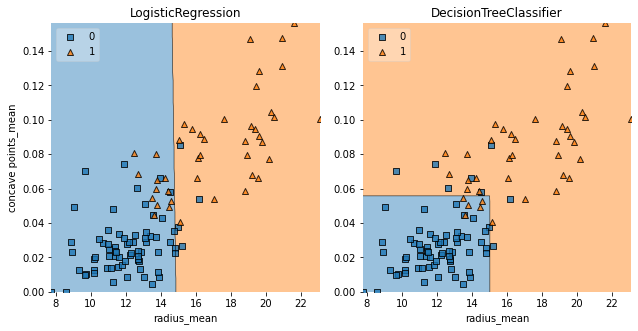

In [19]:
plot_labeled_decision_regions(X_test, y_test, clfs)

Let us augment our model by using some critetions in the building of the model.

In [20]:
tree_entropy = DecisionTreeClassifier(max_depth = 8, criterion = "entropy", random_state = 42)

In [21]:
tree_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=42)

In [22]:
entropy_predict = tree_entropy.predict(X_test)

In [23]:
tree_gini = DecisionTreeClassifier(max_depth = 8, criterion = "gini", random_state = 42)

In [24]:
tree_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=42)

In [25]:
gini_predict = tree_gini.predict(X_test)

In [26]:
accuracy_entropy = accuracy_score(y_test, entropy_predict)
accuracy_gini = accuracy_score(y_test, gini_predict)

In [27]:
print('Accuracy achieved by using entropy: ', accuracy_entropy)
print('Accuracy achieved by using the gini index: ', accuracy_gini)

Accuracy achieved by using entropy:  0.8859649122807017
Accuracy achieved by using the gini index:  0.8771929824561403


Decision Trees can also be used for regression. Let us prepare our data first.

In [28]:
auto_data = pd.read_csv("auto.csv")

In [29]:
auto_data.head()

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


In [30]:
X = auto_data.drop("mpg", axis = 1)
y = auto_data["mpg"]

In [31]:
X["origin"].unique()

array(['US', 'Asia', 'Europe'], dtype=object)

In [32]:
X = pd.get_dummies(X)

In [33]:
X.head()

,displ,hp,weight,accel,size,origin_Asia,origin_Europe,origin_US
0,250.0,88,3139,14.5,15.0,0,0,1
1,304.0,193,4732,18.5,20.0,0,0,1
2,91.0,60,1800,16.4,10.0,1,0,0
3,250.0,98,3525,19.0,15.0,0,0,1
4,97.0,78,2188,15.8,10.0,0,1,0


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21)

In [35]:
tree_reg = DecisionTreeRegressor(max_depth = 4, min_samples_leaf = 0.1, random_state = 21)

In [36]:
tree_reg.fit(X_train, y_train)
y_pred = tree_reg.predict(X_test)

In [37]:
mse = mean_squared_error(y_test, y_pred)

In [38]:
rmse = mse ** (1/2)

In [39]:
print(rmse)
print(r2_score(y_test, y_pred))

3.993514470445271
0.7477645976408053


## The Bias-Variance Tradeoff


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = SEED)

In [41]:
tree = DecisionTreeRegressor(max_depth = 4, min_samples_leaf = 0.14, random_state = SEED)

In [42]:
t0 = time.time()
MSE_CV = - cross_val_score(tree, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error", n_jobs = -1)
t1 = time.time()

total = t1-t0
print(total)

3.336275339126587


In [43]:
MSE_CV = - cross_val_score(tree, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error", n_jobs = -1)

In [44]:
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.14, random_state=123)

In [45]:
y_predict_train = tree.predict(X_train)

In [46]:
y_predict_test = tree.predict(X_test)

In [47]:
print(MSE_CV.mean())

20.505691068058148


In [48]:
print(mean_squared_error(y_train, y_predict_train))

15.299344592866507


In [49]:
print(mean_squared_error(y_test, y_predict_test))

20.923283625005098


Now let us examine Ensemble learning

In [50]:
X = data[["radius_mean", "concave points_mean"]]
y = data["diagnosis"]

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = SEED)

In [52]:
lr = LogisticRegression(random_state = SEED)
knn = KNeighborsClassifier()
tr = DecisionTreeClassifier(random_state = SEED)

In [53]:
classifiers = [
    ("Logistic Regression", lr),
    ("K Nearest Neighbors", knn),
    ("Classification Tree", tr),
]

In [54]:
for clsf_name, clsf in classifiers:
    clsf.fit(X_train, y_train)
    y_pred = clsf.predict(X_test)
    print('{:s} : {:.3f}'.format(clsf_name, accuracy_score(y_test, y_pred)))

Logistic Regression : 0.895
K Nearest Neighbors : 0.906
Classification Tree : 0.912


In [55]:
vc = VotingClassifier(estimators = classifiers)

In [56]:
vc.fit(X_train, y_train)

VotingClassifier(estimators=[('Logistic Regression',
                              LogisticRegression(random_state=123)),
                             ('K Nearest Neighbors', KNeighborsClassifier()),
                             ('Classification Tree',
                              DecisionTreeClassifier(random_state=123))])

In [57]:
y_pred = vc.predict(X_test)
print("Voting classifier: {:.3f}".format(accuracy_score(y_test, y_pred)))

Voting classifier: 0.912


## Bagging and Random Forests

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 1)

In [59]:
tree = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 0.16, random_state = 1)

In [60]:
bag = BaggingClassifier(base_estimator = tree, n_estimators = 300, n_jobs = -1)

In [61]:
bag.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=4,
                                                        min_samples_leaf=0.16,
                                                        random_state=1),
                  n_estimators=300, n_jobs=-1)

In [62]:
y_pred = bag.predict(X_test)

In [63]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Bagging Estimator: {:.4f}".format(accuracy))

Accuracy of Bagging Estimator: 0.8947


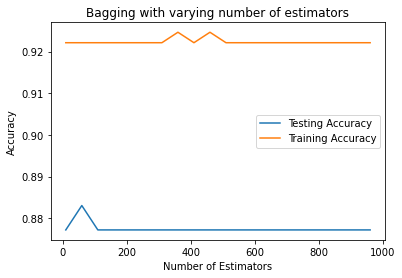

In [64]:
estimators = np.arange(10, 1000, 50)
train_accuracy = np.empty(len(estimators))
test_accuracy = np.empty(len(estimators))


for i, estimator in enumerate(estimators):
    
    bag = BaggingClassifier(base_estimator = tree, n_estimators = estimator, n_jobs = -1)
    bag.fit(X_train, y_train)
    
    train_accuracy[i] = bag.score(X_train, y_train)
    test_accuracy[i] = bag.score(X_test, y_test)
    
# Generate plot
plt.title('Bagging with varying number of estimators')
plt.plot(estimators, test_accuracy, label = 'Testing Accuracy')
plt.plot(estimators, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.show()

Let us now check Out of Bag evaluations (OOB).

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 1)

In [66]:
tree = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 0.16, random_state = 1)

In [67]:
bc = BaggingClassifier(base_estimator = tree, n_estimators = 300, oob_score = True, n_jobs = -1)

In [68]:
bc.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=4,
                                                        min_samples_leaf=0.16,
                                                        random_state=1),
                  n_estimators=300, n_jobs=-1, oob_score=True)

In [69]:
y_pred = bc.predict(X_test)

In [70]:
test_accuracy = accuracy_score(y_test, y_pred)
oob_accuracy = bc.oob_score_
print("Test accuracy of: {:.4f}".format(accuracy))
print("OOB accuracy of: {:.4f}".format(oob_accuracy))

Test accuracy of: 0.8947
OOB accuracy of: 0.9121


Now let us look at Random Forests.

In [71]:
auto_data.head()

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


In [72]:
X = pd.get_dummies(auto_data.drop("mpg", axis = 1))

In [73]:
y = auto_data["mpg"]

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [75]:
forest = RandomForestRegressor(n_estimators = 400, min_samples_leaf = 0.12, random_state = 1)

In [76]:
forest.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=0.12, n_estimators=400, random_state=1)

In [77]:
y_pred = forest.predict(X_test)

In [78]:
rmse_test = mean_squared_error(y_test, y_pred) ** (1/2)

In [79]:
print(rmse_test)

3.9783131439894097


In [80]:
forest.feature_importances_

array([4.00376619e-01, 1.67429752e-01, 1.88745271e-01, 2.43724032e-05,
       2.43423986e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

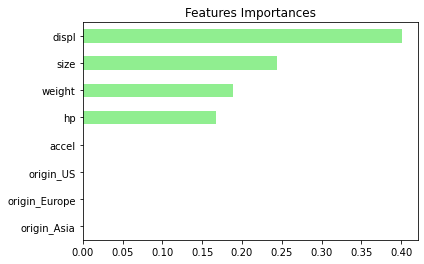

In [81]:
# Create a pd.Series of features importances
importances = pd.Series(data = forest.feature_importances_,
                        index = X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind ='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

## Boosting

Let us now examine Adaboost.

In [82]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [83]:
data = data.drop("Unnamed: 32", axis = 1)
data = data.dropna()

In [84]:
X = data.drop("diagnosis", axis = 1)

In [85]:
y = data["diagnosis"]
y = y.replace({"M": 1, "B": 0})

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 1)

In [87]:
tree = DecisionTreeClassifier(max_depth = 1, random_state = 1)

In [88]:
ada = AdaBoostClassifier(base_estimator = tree, n_estimators = 100)

In [89]:
ada.fit(X_train, y_train)
y_pred_proba = ada.predict_proba(X_test)[:,1]

In [90]:
roc = roc_auc_score(y_test, y_pred_proba)

In [91]:
print(roc)

0.9840829439252335


Gradient Boosting

In [92]:
X = auto_data.drop("mpg", axis = 1)
X = pd.get_dummies(X)
y = auto_data["mpg"]

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [94]:
gbt = GradientBoostingRegressor(n_estimators = 300, max_depth = 1, random_state = 1)

In [95]:
gbt.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=1, n_estimators=300, random_state=1)

In [96]:
y_pred = gbt.predict(X_test)

In [97]:
rmse = mean_squared_error(y_test, y_pred) ** (1/2)

In [98]:
print(rmse)

4.0142669605222805


Stochastic Gradient Boosting

In [99]:
sgbt = GradientBoostingRegressor(n_estimators = 300, max_depth = 1, subsample = 0.8, max_features = 0.2, random_state = 1)

In [100]:
sgbt.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=1, max_features=0.2, n_estimators=300,
                          random_state=1, subsample=0.8)

In [101]:
y_pred = sgbt.predict(X_test)

In [102]:
rmse = mean_squared_error(y_test, y_pred) ** (1/2)

In [103]:
print(rmse)

3.9542590299829556


## Model Tuning

Here we will be doing some exercises with Grid search.

In [104]:
data_indian = pd.read_csv("indian_liver_patient_preprocessed.csv")
data_indian.head()

,Unnamed: 0,Age_std,Total_Bilirubin_std,Direct_Bilirubin_std,Alkaline_Phosphotase_std,Alamine_Aminotransferase_std,Aspartate_Aminotransferase_std,Total_Protiens_std,Albumin_std,Albumin_and_Globulin_Ratio_std,Is_male_std,Liver_disease
0,0,1.247403,-0.420320,-0.495414,-0.428870,-0.355832,-0.319111,0.293722,0.203446,-0.147390,0,1
1,1,1.062306,1.218936,1.423518,1.675083,-0.093573,-0.035962,0.939655,0.077462,-0.648461,1,1
2,2,1.062306,0.640375,0.926017,0.816243,-0.115428,-0.146459,0.478274,0.203446,-0.178707,1,1
3,3,0.815511,-0.372106,-0.388807,-0.449416,-0.366760,-0.312205,0.293722,0.329431,0.165780,1,1
4,4,1.679294,0.093956,0.179766,-0.395996,-0.295731,-0.177537,0.755102,-0.930414,-1.713237,1,1


In [105]:
X = data_indian.drop(["Unnamed: 0", "Liver_disease"], axis = 1)
y = data_indian["Liver_disease"]

In [106]:
params = {
    "max_depth": [3, 4, 5, 6],
    "min_samples_leaf": [0.04, 0.06, 0.08],
    "max_features": [0.2, 0.4, 0.6, 0.8]
}

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [108]:
tree = DecisionTreeClassifier(max_depth = 1, random_state = 1)

In [109]:
grid = GridSearchCV(estimator = tree,
                    param_grid = params,
                    scoring = "accuracy",
                    cv = 10,
                    n_jobs = -1)

In [110]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(max_depth=1, random_state=1),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6],
                         'max_features': [0.2, 0.4, 0.6, 0.8],
                         'min_samples_leaf': [0.04, 0.06, 0.08]},
             scoring='accuracy')

In [111]:
best_hyperparams = grid.best_params_

In [112]:
print(best_hyperparams)

{'max_depth': 3, 'max_features': 0.2, 'min_samples_leaf': 0.08}


In [113]:
best_model = grid.best_estimator_
test_acc = best_model.score(X_test, y_test)
print(test_acc)

0.7298850574712644


Let us now do a grid search on a random forest instead of on a single tree.

In [114]:
X = auto_data.drop("mpg", axis = 1)
y = auto_data["mpg"]
X = pd.get_dummies(X)

In [115]:
rf = RandomForestRegressor(random_state=1)

In [116]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [117]:
params_rf = {
    "n_estimators": [300, 400, 500],
    "max_depth": [4, 6, 8],
    "min_samples_leaf": [0.1, 0.2],
    "max_features": ["log2", "sqrt"]
}

In [118]:
grid_rf = GridSearchCV(estimator=rf,
                      param_grid=params_rf,
                      cv = 3,
                      scoring = "neg_mean_squared_error",
                      verbose = 1,
                      n_jobs = -1)

In [119]:
grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:   18.3s finished


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [0.1, 0.2],
                         'n_estimators': [300, 400, 500]},
             scoring='neg_mean_squared_error', verbose=1)

In [120]:
best_params = grid_rf.best_params_

In [121]:
print(best_params)

{'max_depth': 6, 'max_features': 'log2', 'min_samples_leaf': 0.1, 'n_estimators': 400}


In [122]:
best_model = grid_rf.best_estimator_

In [123]:
print(best_model)

RandomForestRegressor(max_depth=6, max_features='log2', min_samples_leaf=0.1,
                      n_estimators=400, random_state=1)


In [124]:
y_pred = best_model.predict(X_test)

In [125]:
rmse_test = mean_squared_error(y_test, y_pred) ** (1/2)

In [126]:
print(rmse_test)

0.4060346879415572
